In [18]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt 
import os
import base64
from requests import post, get
import json
import time
import pandas as pd
import numpy as np
import time
import ast

In [48]:
df = pd.read_csv('/content/drive/MyDrive/ML_SPOTIFY/final_dataset.csv')

In [49]:
df.rename(columns={"durationms":"duration_ms"},inplace=True)
df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [50]:
#df = df[df['year']<2018]

In [51]:
df.head()

,id,name,artists,artistid,explicit,popularity,duration_ms,year,genres,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,3w3y8KPTfNeOKPiqUTakBh,Locked out of Heaven,['Bruno Mars'],0du5cEVh5yTK9QJze8zA0C,False,84,233478,2012,"['dance pop', 'pop']",0.726,0.04900,0.698,0.000000,0.3090,-4.165,0.0431,143.994,0.867
1,3TGRqZ0a2l1LRblBkJoaDx,Call Me Maybe,['Carly Rae Jepsen'],6sFIWsNpZYqfjUpaCgueju,False,69,193400,2012,"['canadian pop', 'dance pop', 'electropop', 'p...",0.783,0.01140,0.580,0.000002,0.1080,-6.548,0.0408,120.021,0.660
2,7a86XRg84qjasly9f6bPSD,We Are Young (feat. Janelle Monáe),"['fun.', 'Janelle Monáe']",5nCi3BB41mBaMH9gfr6Su0,False,70,250626,2012,"['baroque pop', 'metropopolis', 'modern rock',...",0.378,0.02000,0.638,0.000077,0.0849,-5.576,0.0750,184.086,0.735
3,1z9kQ14XBSN0r2v6fx4IdG,Diamonds,['Rihanna'],5pKCCKE2ajJHZ9KAiaK11H,False,67,225146,2012,"['barbadian pop', 'dance pop', 'pop', 'urban c...",0.564,0.00125,0.710,0.000000,0.1090,-4.920,0.0461,91.972,0.393
4,3GZD6HmiNUhxXYf8Gch723,Lost,['Frank Ocean'],2h93pZq0e7k5yf4dywlkpM,True,81,234093,2012,"['hip hop', 'lgbtq+ hip hop', 'neo soul', 'pop']",0.913,0.02720,0.603,0.000503,0.1670,-4.892,0.2260,123.061,0.497


In [52]:
#track_feat_df = pd.read_csv('/content/drive/MyDrive/ML_SPOTIFY/tracks_features.csv')

In [53]:
#track_feat_df= track_feat_df[track_feat_df['year']>2006]

In [54]:
features_li = [
 'danceability',
 'acousticness',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo']

In [55]:
X = df[features_li]

In [56]:

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

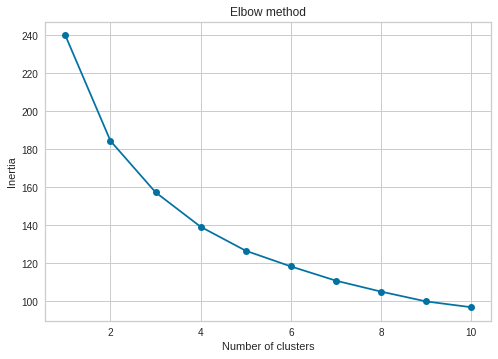

In [57]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

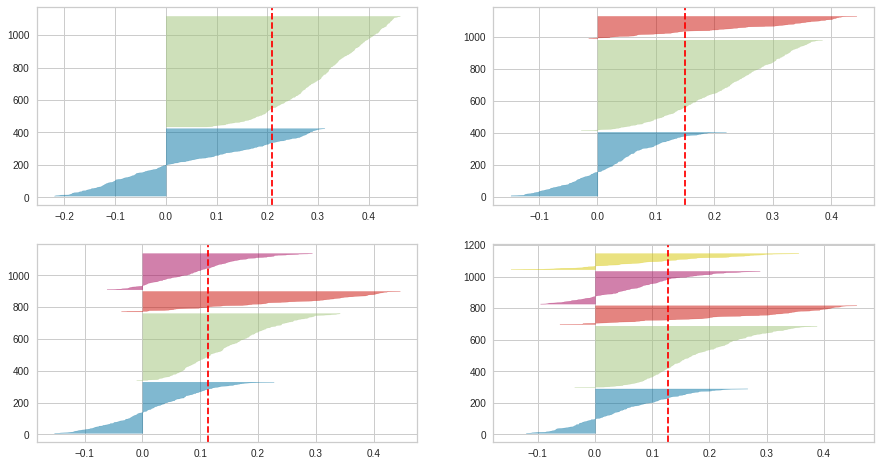

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=1, max_iter=1, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    
    visualizer.fit(X)

In [59]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

X_sample = df2[features_li]
X_sample = scaler.transform(X_sample)
cl = kmeans.predict(X_sample)
print(cl)

[3 3 3 1 3 3 1 3 1 3 3 1 2 3 1 2 3 2 2 0 0 3 3 3 2 2 3 2 3 3 0 3 0 3 1 3 3
 0 2 3 3 0 3 3 2 1 3 3 3 0 0 1 3 3 3 3 1 1 2 0 3 3 3 2 1 2 0 3 3 3 2 3 2 3
 3 3 3 2 2 3 1 2 2 1]


In [89]:
len(kmeans.labels_)

1100

In [90]:
df['cluster'] = kmeans.labels_
df.to_csv('clustered_data_kmeans_4.csv')

In [60]:
df2['cluster'] = cl

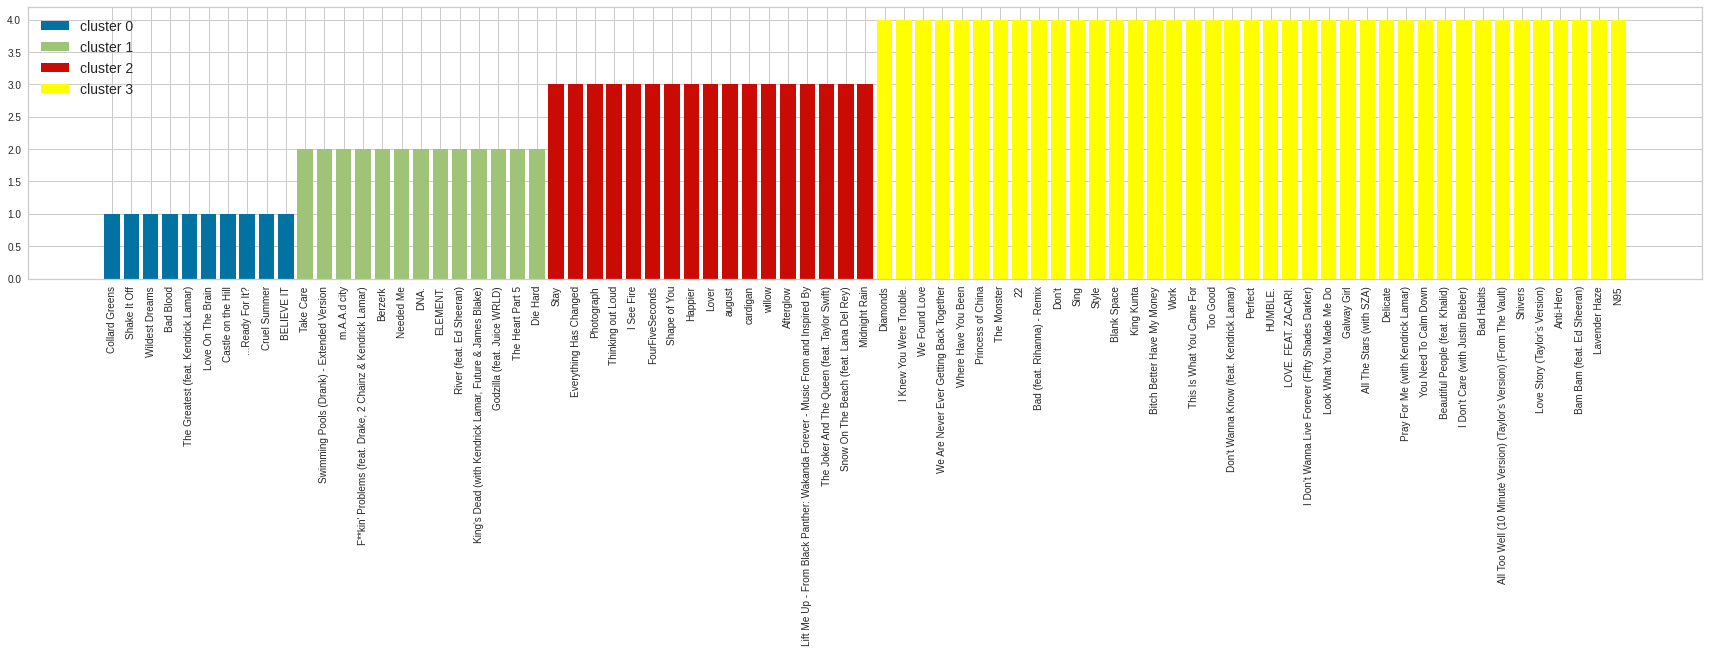

In [87]:
df_c1 = df2[df2['cluster'] == 0]
df_c2 = df2[df2['cluster'] == 1]
df_c3 = df2[df2['cluster'] == 2]
df_c4 = df2[df2['cluster'] == 3]

f, ax = plt.subplots(figsize=(30,5)) # set the size that you'd like (width, height)
plt.bar(df_c1['name'], df_c1['cluster'] + 1, label = 'cluster 0')
plt.bar(df_c2['name'], df_c2['cluster'] + 1, label = 'cluster 1')
plt.bar(df_c3['name'], df_c3['cluster'] + 1, label = 'cluster 2')
plt.bar(df_c4['name'], df_c4['cluster'] + 1, label = 'cluster 3',color='yellow')
plt.xticks(rotation=90)
ax.legend(fontsize = 14)
plt.savefig("barplt.jpg", bbox_inches='tight',pad_inches=0.1)

The dataset is too large for proper dendrogram visualiztion after performing hierarchial clustering. Therefore we will take a small sample with some known labels to see if any information could be mined from the clusters. 

In [40]:
df2 = df.copy()

In [41]:
import re

df2['isartist'] = False

def get_artist(x, name):
  if name in x['artists'] :
    return True 
  return x['isartist']

  
for name in ['Kendrick Lamar','Taylor Swift','Eminem','Rihanna','Ed Sheeran']:
  df2['isartist'] = df2.apply(lambda x: get_artist(x,name),axis=1) 

In [42]:

df2['artist_name'] = "na"

def get_artist(x, name):
  if name in x['artists'] :
    return name 
  else:
    return x['artist_name']
  
for name in ['Kendrick Lamar','Taylor Swift','Eminem','Rihanna','Ed Sheeran']:
  df2['artist_name'] = df2.apply(lambda x: get_artist(x,name),axis=1) 

In [45]:
df2 = df2[df2['isartist']]

In [44]:
df2.to_csv('sampled_data.csv')